# Progetto FAD 25-26

Progetto di gruppo per il corso di *Fondamenti di Analisi dei Dati* — A.A. 2025/2026

**Nome del gruppo**: *The Bayesians*

**Membri del gruppo**:
- *Filippo Falzone*  
- *Francesco Greco*

Il progetto si basa sullo studio di un dataset contenente informazioni circa varie automobili vendute.
I dati sono stati raccolti in India e le auto vendute sono usate. Quindi lo studio si baserà sul comprendere il mercato delle automobili usate in India.

---

## 1. Analisi dei dati

Questa fase iniziale è dedicata alla **comprensione approfondita del dataset**. Si procede con l'esplorazione, la pulizia dei dati (data cleaning) per gestire valori mancanti e anomalie, e l'analisi descrittiva per inferire le prime caratteristiche e tendenze chiave delle variabili.

### - Data Understanding

Ci concentreremo sull'iniziare a conoscere il dataset, comprendendo a fondo il significato di ogni variabile e formulando alcune domande su cui strutturare le successive fasi dell'analisi dei dati.

In [3927]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data_set/train-data.csv', index_col=0)

# 'df_clean' coneterrà il dataset pulito
df_clean = df.copy()

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Vediamolo nel dettaglio:

In [3928]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


> Il nostro dataset ha **13 caratteristiche** (colonne) e **6019 osservazioni** (righe).

Adesso creiamo un dizionario dei dati, in modo da avere una comprensione maggiore delle varie caratteristiche.

**Dizionario dei Dati**
| Variabile             | Tipo / Scala                     | Descrizione                                                                                         | Unità / Note |
| --------------------- | -------------------------------- | --------------------------------------------------------------------------------------------------- | ------------ |
| **Name**              | Qualitativa / Nominale           | Combinazione di marchio e modello dell’auto. | –            |
| **Location**          | Qualitativa / Nominale           | Città o regione in cui l’auto è in vendita.                                                         | –            |
| **Year**              | Numerica / Discreta / Intervalli | Anno di produzione del modello.                | –            |
| **Kilometers_Driven** | Numerica / Continua / Ratio      | Chilometri totali percorsi dall’auto.                                                               | km           |
| **Fuel_type**         | Qualitativa / Nominale           | Tipo di carburante utilizzato dall’auto.                                                            | –            |
| **Transmission**      | Qualitativa / Nominale            | Tipo di trasmissione: `automatica` o `manuale`.                                                         | –            |
| **Owner_Type**        | Qualitativa / Ordinale           | Indica il numero di proprietari precedenti che il veicolo ha avuto prima del venditore attuale. Le categorie sono ordinate per numero crescente di proprietari: `first_hand` (il venditore è il primo proprietario), `second_hand`, `third_hand`, e `fourth_above` (quattro o più proprietari).                            | –            |
| **Mileage**           | Numerica / Continua / Ratio      | Consumo di carburante dell’auto.                                               | kmpl o km/kg |
| **Engine**            | Numerica / Continua / Ratio      | Cilindrata del motore.                                                                              | cc           |
| **Power**             | Numerica / Continua / Ratio      | Potenza massima del motore.                                                                         | bhp          |
| **Seats**             | Numerica / Discreta / Ratio      | Numero di posti a sedere.            | –            |
| **New_Price**         | Numerica / Continua / Ratio      | Rappresenta il prezzo di un auto nuova dello stesso modello.                                                         | INR Lakhs    |
| **Price**             | Numerica / Continua / Ratio      | Prezzo di vendita dell’auto usata.                 | INR Lakhs    |


Alcune considerazioni sulle variabili:
- da `Name` potremmo estrarre marchio dell'auto e modello
- da `Year` possiamo calcolare l'età dell'auto
- `Transmission` è una variabile binaria (ha solo due possibili categorie)
- modifica di `Owner_Type` in modo da renderla discreta ordinale
- `Seats` può aiutare a classificare il veicolo (SUV, sportiva, etc...)
- individuiamo `Price` come variabile target da predire per nuove osservazioni

**Obiettivi dell'Analisi dei Dati**


Dopo aver descritto e compreso le varie caratteristiche del dataset abbiamo formulato alcuni **obiettivi** su cui basare la nostra analisi dei dati, che ricordiamo basarsi sullo studio del mercato di auto usate in India:
- Quali sono i fattori principali che determinano il prezzo (`Price`) di un'auto usata? 
- In che modo l'età dell'auto (derivata da `Year`) e i chilometri percorsi (`Kilometers_Driven`) interagiscono nel definire il valore?
- Quale impatto hanno le caratteristiche tecniche come il motore o la potenza (`Engine` o `Power`) e il tipo di cambio (`Transmission`) sul prezzo?
- Esistono marche (estratte da `Name`) o località (`Location`) specifiche in cui le auto mantengono meglio il loro valore?  

---

### Data Cleaning & Preparation

È molto importate preparare il dataset prima di poter iniziare ad analizzare le variabili e come essere sono correlate. Questo perché eventuali valori mancanti o anomalie (outlier) ci porterebbo a conclusioni errate o inconsistenti.

Cominciamo dando un occhiata ai **valori mancanti** (Nan) presenti nelle nostre colonne:

In [3929]:
print(df.isna().sum())

print("")

print("---- Nan percentage per variable ----")
for x in df:
    if df[x].isnull().sum() > 0:
        value = (df[x].isna().sum()/len(df[x])) * 100
        print(f"{x}: {value:.2f}%")

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

---- Nan percentage per variable ----
Mileage: 0.03%
Engine: 0.60%
Power: 0.60%
Seats: 0.70%
New_Price: 86.31%


Vediamo che la maggior parte delle colonne contengono una **quantità irrilevanti di valori mancati**. Quelli che sono presenti (i missing values) si possono sistemare facilmente: o eliminiamo quelle righe, oppure facendp un'imputazione veloce utilizzando la media o la mediana.

Tuttavia `New_Price` è un **disastro**: 5195 su 6019 righe sono vuote. Parliamo dell'86% dei dati.

- **Imputazione**: impossibile, Il prezzo di listino dello stesso modello è troppo specifico; non possiamo stimarlo tramite le caratteristiche presenti in questo dataset. Non è come stimare il chilometraggio, questo è un valore che dipende da altre variabili.

- **Inutilizzabile**: Avere così tanti buchi rende la colonna inutile sia per un analisi e sia per la fase di modeling. Non possiamo farci affidamento.

Verifichiamo se nel nostro dataset sono presenti **righe duplicate**, che porterebbero ad un analisi non corretta, e nel caso eliminarle:

In [3930]:
duplicate_count = df_clean.duplicated().sum()

df_clean.drop_duplicates(inplace=True)

print(f"Rimosse di n. righe duplicate: {duplicate_count}")


Rimosse di n. righe duplicate: 0


Adesso eseguiremo **per ogni caratterisitca** un processo di Data Cleaning che includerà:
- gestione dei Valori Mancanti
- Correzzione di Inconsistenze e Formattazione 
- Gestione degli outliers

**1. `Name`**

Ricordiamo che 'Name' contiene il brand e il modello dell'auto in osservazione.

> Contiene una stringa '\<brand> <modello>'

Inoltre, come abbiamo verificato poco fa, non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Per la variabile 'Name', che include sia il brand che il modello del veicolo, abbiamo deciso di applicare Feature Engineering per scomporre questa stringa in due nuove variabili distinte: Brand e Model. Questo perché, anche se la variabile 'Name' è pulita, l'analisi e la modellazione predittiva traggono molti benefici da variabili con un unico scopo ben definito. 

Creeremo quindi le due nuove variabili Brand e Model estraendole dalla stringa originale.

In [3931]:
df_clean['Brand'] = df_clean['Name'].str.split(' ').str[0]
df_clean['Model'] = df_clean['Name'].str.split(' ').str[1]
df_clean = df_clean.drop('Name', axis=1)

first_cols = ['Brand', 'Model']

remaining_cols = [col for col in df_clean.columns if col not in first_cols]

df_clean = df_clean[first_cols + remaining_cols]

print("Model e Brand creati e inseriti come prime due colonne.")

df_clean = df_clean.reset_index(drop=True)

df_clean.head()

Model e Brand creati e inseriti come prime due colonne.


,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Non è necessario alcun controllo degli outlier nelle due nuove colonne create.

**2. `Location`**

Ricordiamo che 'Location' contiene il luogo in cui l'auto è stata venduta.

> Contiene una stringa \<location>

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

Non sono necessari controlli su questa variabile, potremmo controllare se i nomi dei luoghi assunti da essa **esistono veramente**. Lo faremo ma solo per ottenere **informazioni circa i luoghi** in cui queste auto sono state rivendute:

In [3932]:
print(df_clean['Location'].unique())
print("")
print(df_clean['Location'].value_counts())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64


Abbiamo esaminato i luoghi riportati sopra, non solo essi non sono frutto di errore o fantasia, ma sono tutte **grandi città metropolitane** indiane.

Non è necessario alcun controllo degli outlier per questa variabile.

**3. `Year`**

Questa variabile indica l'anno in cui l'auto è stata prodotta.

> Contiene un valore discreto.

Come visto prima non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Per questa variabile non servono particolari controlli di questo tipo. Ma possiamo applicare pure qui un po di Feature Engeneering per trarre l'età dell'auto. Questo perché a noi non interessa sapere l'anno di fabbricazione, ma è l'età dell'auto che influisce sul prezzo.

Sembra che il dataset utilizzi come anno di riferimento il 2019, quindi l'età è la differenza Anno_di_produzione - Year.

Creeremo quindi la variabile `Age`:

In [3933]:
ANNO_DI_RIFERIMENTO = 2019

index_year = df_clean.columns.get_loc('Year')
age_values = ANNO_DI_RIFERIMENTO - df_clean['Year']
df_clean.insert(index_year, 'Age', age_values)
df_clean.drop('Year', axis=1, inplace=True)

print('Age creata con successo.')

Age creata con successo.


*Gestione degli Outlier*

Inizieremo mostrando un boxplot per questa variabile:

<Axes: >

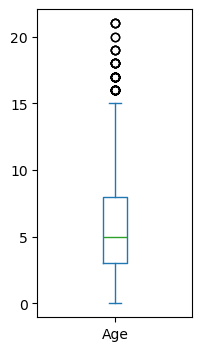

In [3934]:
df_clean['Age'].plot.box(figsize=(2,4))

Age (Year) non presenta molti outlier, con molta probabilità sono auto molto vecchie che seguono normative ed un mercato differente, che potrebbero portare solamente a confusione. Abbiamo scelto d rimuovere le auto più vecchie di 14 anni (2005).

In [3935]:
threshold = 14
auto_vecchie = df_clean[df_clean['Age'] > threshold]

df_clean = df_clean[df_clean['Age'] <= threshold]
df_clean.reset_index(drop=True, inplace=True)

print(f"Numero di auto rimosse: {len(auto_vecchie)}")

Numero di auto rimosse: 81


**4. `Kilometers_Driven`**

Questa variabile contiene quanti chilometri ha percorso l'auto.

> Contiene un valore continuo

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

Questa variabile è gia pulita, non ci sono particolari controlli da fare

*Gestione degli outliers*

Inizieremo plottando un boxplot:

<Axes: >

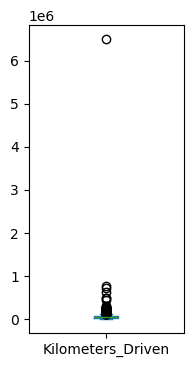

In [3936]:
df_clean['Kilometers_Driven'].plot.box(figsize=(2,4))

Si nota subito quel numero spaventoso lì in alto, sicuramente impossibile. Sicuramente un errore. Meglio rimuoverlo.

Ci aspetteremmo comunque che auto che superino il milione di chilometri percorsi siano outliers. Perché potrebbero essere sia errori dovuti all'inserimento e sia auto molto molto vecchie.

In [3937]:
print("Outlier estremi:")
print(df_clean[df_clean['Kilometers_Driven'] >= 1000000])

df_clean = df_clean[df_clean['Kilometers_Driven'] < 1000000]
df_clean.reset_index(drop=True, inplace=True)

Outlier estremi:
     Brand Model Location  Age  Kilometers_Driven Fuel_Type Transmission  \
2300   BMW    X5  Chennai    2            6500000    Diesel    Automatic   

     Owner_Type     Mileage   Engine    Power  Seats New_Price  Price  
2300      First  15.97 kmpl  2993 CC  258 bhp    5.0       NaN   65.0  


Plottiamo di nuovo il boxplot:

<Axes: >

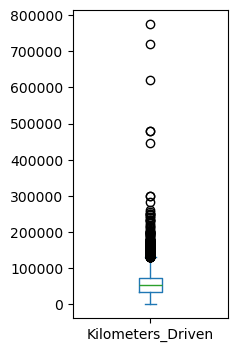

In [3938]:
df_clean['Kilometers_Driven'].plot.box(figsize=(2,4))

Vogliamo sistemare questi outlier imputando il 99° percentile. Perché i valori sono troppo distanti, potrebbe portare solo che rumore al modello. Inoltre nel mercato odierno già sopra un tot chilometri sarebbero da rottamare le auto. Quindi potremmo usare il 99° percentile proprio per dire al modello di considerare l'auto massimamente usata, dato che dopo una certa soglia non c'è quasi nulla più da togliere. 

Soglia (99%): 170000 km


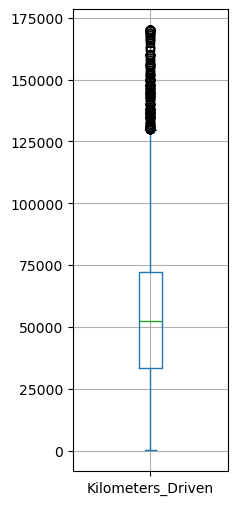

In [3939]:
soglia_99 = df_clean['Kilometers_Driven'].quantile(0.99)
print(f"Soglia (99%): {soglia_99:.0f} km")

df_clean['Kilometers_Driven'] = np.where(df_clean['Kilometers_Driven'] > soglia_99, 
                                   soglia_99, 
                                   df_clean['Kilometers_Driven'])

df_clean.reset_index(drop=True, inplace=True)

df_clean['Kilometers_Driven'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Sembra che non ci sia altro da fare per questa variabile.

**5. `Fuel_Type`**

'Fuel_Type' contiene il tipo di carburante utilizzato dall'auto.

> Contiene una stringa '\<tipo_di_carburante>'

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [3940]:
df_clean['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3187
Petrol      2682
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

Notiamo subito il duopolio Diesel e Petrol, poi ci sono alcune nicchie. 

La presenza di auto che fanno uso di 'CNG' e 'LPG' e di auto elettriche è un po' problematica. La poca presenza nel dataset potrebbe indicare che c'è **poco mercato** nella regione di studio per auto di questa tipologia.

Inoltre, come vedremo più avanti, la caratteristica `Mileage` (chilometri percorsi per quantità utilizzata di carburante) utilizza due differenti unità di misura: una per 'Diesel' e 'Petrol ed una per 'LPG' e 'CNG', addirittura ha valori nulli per 'Electric'. Rendendo più complessa la loro gestione.

Data la scarsità di informazioni e la bassa rappresentatività di queste nicchie, uno studio approfondito che le includa risulterebbe eccessivamente complesso e poco significativo.

Pertanto, per ottimizzare l'analisi, la decisione è di escludere le tipologie di carburante 'Electric', 'CNG' e 'LPG' dal dataset.

In [3941]:
# Rimuoviamo le auto elettriche
df_clean = df_clean[(df_clean['Fuel_Type'] != 'Electric') & (df_clean['Fuel_Type'] != 'CNG') & (df_clean['Fuel_Type'] != 'LPG')]

df_clean = df_clean.reset_index(drop=True)

print("Nicchie rimosse.")

Nicchie rimosse.


Per Fuel_Type non è necessario alcuna gestione degli outliers.

**6. `Transmission`**

Contiene un'etichetta, ovvero il tipo di cambio dell'auto.

> Contiene una stringa.

Come visto prima non ha valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [3942]:
df_clean['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Assume solamente due etichette, se l'auto e manuale o automatica. In futuro possiamo farla diventare una variabile discreta binaria per una possibile modellazione.

Per questa variabile non è necessario alcuna gestione degli outliers.

**7. `Owner_Type`**

Contiene un'etichetta, ovvero quanti proprietari aveva l'auto al momento della vendita.

> Contiene una stringa.

Come visto prima non ha valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [3943]:
df_clean['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

Non sembrano esserci problemi, in futuro potremmo farla diventare una variabile numerica discreta per la parte di modeling.

Per Transmission non è necessario alcuna gestione degli outliers.

**8. `Mileage`**

Contiene l'efficienza del motore dell'auto.

> Contiene una **stringa** forma '\<valore\> \<unità di misura\>'

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.


Verifichiamo il numero di valori mancanti:

In [3944]:
print("Valori mancanti:", df_clean['Mileage'].isna().sum())

Valori mancanti: 0


Notiamo come Mileage inizialmente aveva 2 valori mancanti, ma adesso ne ha zero. Questo potrebbe essere dovuto al fatto che gli unici due valori mancanti appartenevano alle auto elettriche, eliminate dal dataset in precedenza. Questo perché l'informazione di Mileage, ovvero *km/quantità_carburante*, per un auto elettrica non ha senso.

*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [3945]:
df_mileage = df['Mileage'].dropna()

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_mileage.astype(str).str.match(pattern)

total_obs = len(df_mileage)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
mileage_units = df_mileage.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
mileage_units.unique()

Conformi: 6017
Non conformi: 0

---- Unità di misura presenti ----


array(['km/kg', 'kmpl'], dtype=object)

Per nostra fortuna tutte le righe **seguono la formattazione prevista**, tuttavia vengono usate **due differenti unità di misura**: 'km/kg' e 'kmpl' (chilometri su chulogrammo e chulometri al litro).

Queso potrebbe essere perché differenti tipi di carburante (`Fuel_Type`) vengono misuranti in modo differente e quindi pure la misura di `Mileage` deve adattarsi.

Indaghiamo meglio:

In [3946]:
print(mileage_units.value_counts())
print("")

print(df['Fuel_Type'].value_counts())
print("")

cross_tab = pd.crosstab(mileage_units, df['Fuel_Type'])
print(cross_tab)

Mileage
kmpl     5951
km/kg      66
Name: count, dtype: int64

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

Fuel_Type  CNG  Diesel  LPG  Petrol
Mileage                            
km/kg       56       0   10       0
kmpl         0    3205    0    2746


Notiamo varie cose:
- le osservazioni che utilizzano 'km/kg' come unità per `Mileage` sono molto poche
- per i carburanti l'uso delle unità di misura per `Mileage` sono consistenti: nessun tipo di carburante (`Fuel_Type`) utilizza entrambe le unità per le sue osservazioni
- le osservazioni che utilizzano 'km/kg' per `Mileage` (66) coincidono con quelle che utilizzano i due tipi di carburante (`Fuel_Type`) meno presenti (CNG 56, LPG 10)

Essendo che sia i valori mancanti e sia le osservazioni che utilizzano differenti unità di misura coincidono con le osservazioni rimosse nella sezione di `Fuel_Type`, `Mileage` è gia pulita.

Procediamo con l'estrarre i valori numerici:

In [3947]:
df_clean['Mileage'] = df_clean['Mileage'].str.split(' ').str[0]
df_clean['Mileage'] = pd.to_numeric(df_clean['Mileage'], errors='coerce')

df_clean['Mileage'] = df_clean['Mileage'].astype('int64')

print("Valori estratti.")

Valori estratti.


*Gestione degli Outliers*

Plottiamo il boxplot:

<Axes: >

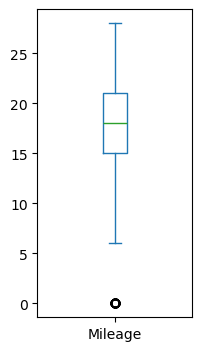

In [3948]:
df_clean['Mileage'].plot.box(figsize=(2,4))

Notiamo che abbiamo dei valori molto vicini a zero, auto che hanno un alta efficienza esistono, ma valori così bassi sono impossibili. Scegliamo 3 kmpl come soglia.

In [3949]:
soglia = 3
print(f"Valori per mileage inaccettabili: {len(df_clean[df_clean['Mileage'] < soglia])}")

Valori per mileage inaccettabili: 56


Queste righe sono i valori inaccettabili, sono outliers. Imputare dei valori a queste osservazioni è molto difficile a causa della dipendenza di Mileage da altre caratteristiche dell'auto che non abbiamo, per questo abbiamo deciso di rimuovere queste osservazioni.

In [3950]:
df_clean = df_clean[~df_clean['Mileage'] < soglia]
df_clean = df_clean.reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


**9. `Engine`**

Assume come valore la cilindrata in CC (centimetri-cubi) del motore dell'auto.

> Contiene una **stringa** forma '\<valore\> \<unità di misura\>'

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.

*Gestione dei valori mancanti*

In [3951]:
print("Valori mancanti:", df_clean['Engine'].isna().sum())


Valori mancanti: 30


Meno del 1% delle osservazioni ha un valore mancante per Engine.

Potremmo imputare il valore inserendo al media dei valori (più robusta agli outlier), ma essendo che il dataset contiene sia auto di lusso e sia auto economiche rischieremmo di inserire un valore non valido per il tipo di auto e quindi di creare degli outlier. 

Per questo motivo abbiamo deciso di eliminare le osservazioni che presentano dei valori mancanti.

In [3952]:
df_clean = df_clean[~df_clean['Engine'].isna()].reset_index(drop=True)

print("Righe rimosse.")


Righe rimosse.


*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [3953]:
df_engine = df_clean['Engine']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_engine.astype(str).str.match(pattern)

total_obs = len(df_engine)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
engine_units = df_engine.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
engine_units.unique()

Conformi: 5839
Non conformi: 0

---- Unità di misura presenti ----


array(['CC'], dtype=object)

Perfetto sono tutte conformi, adesso possiamo procedere con l'estrarre il valore numerico:

In [3954]:
df_clean['Engine'] = df_clean['Engine'].str.split(' ').str[0]
df_clean['Engine'] = pd.to_numeric(df_clean['Engine'], errors='coerce')

df_clean['Engine'] = df_clean['Engine'].astype('int64')

print("Valori estratti.")

Valori estratti.


*Gestione degli outliers*

Stampiamo il boxplot:

<Axes: >

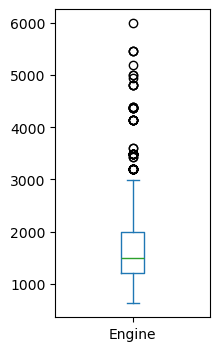

In [3955]:
df_clean['Engine'].plot.box(figsize=(2,4))

In Engine non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così.

**10. `Power`**

Contiene la potenza dell'auto espressa in bhp.

> Contiene una **stringa** forma '\<valore\> \<unità di misura\>'

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.

*Gestione dei valori mancanti*


In [3956]:
print(f"Valori mancanti: {df_clean['Power'].isna().sum()}")

Valori mancanti: 0


Notiamo che non ha valori mancanti, mentre prima abbiamo visto che li aveva, molto probabilmente perché queste osservazioni coincidono con quelle eliminate in precedenza

*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [3957]:
df_power = df_clean['Power']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_power.astype(str).str.match(pattern)

total_obs = len(df_power)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
power_units = df_power.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
power_units.unique()

Conformi: 5839
Non conformi: 0

---- Unità di misura presenti ----


array(['bhp'], dtype=object)

Perfetto sono tutte conformi, adesso possiamo procedere con l'estrarre il valore numerico:

In [3958]:
df_clean['Power'] = df_clean['Power'].str.split(' ').str[0]
df_clean['Power'] = pd.to_numeric(df_clean['Power'], errors='coerce')

df_clean['Power'] = df_clean['Power'].astype('float64')

print("Valori estratti.")

Valori estratti.


*Gestione degli outliers*

Stampiamo il boxplot:

<Axes: >

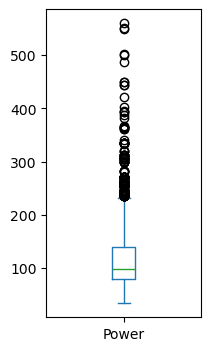

In [3959]:
df_clean['Power'].plot.box(figsize=(2,4))

In Power non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così. Stesso discorso che valeva anche per Engine. Infatti vedremo più avanti che queste due variabili sono altamente correlate.

**11. `Seats`**

Contiene il numero di passeggeri che può ospitare l'auto.

> Contiene un valore discreto.

*Gestione valori mancanti*

In [3960]:
print(f"Valori mancanti: {df_clean['Power'].isna().sum()}")

Valori mancanti: 94


Mancano alcuni valori, vediamo quali valori assume questa variaibile. Ci aspetteremmo una predominanza di auto a 5 posti, che sono le più diffuse.

In [3961]:
df_clean['Seats'].value_counts()

Seats
5.0     4895
7.0      668
8.0      131
4.0       88
6.0       29
2.0       16
9.0        3
10.0       2
0.0        1
Name: count, dtype: int64

Visto che il valore che esce più spesso è 5, e dato che vogliamo tenere più dati possibili, abbiamo deciso di fare una cosa semplice: sostituire i valori mancanti nella colonna dei posti con un bel '5'.

Così facciamo un piccolo "errore" statistico, perché stiamo gonfiando un po' la categoria da 5 posti. Però è un ottimo compromesso tra l'essere precisi e l'avere un dataset completo.

Dato che i dati mancanti sono davvero pochi (solo il 2%!), questo piccolo trucchetto non rovinerà l'analisi generale né influenzerà seriamente il modello finale.

Procediamo all'imputazione:

In [3962]:
df_clean['Seats'] = df_clean['Seats'].fillna(5)

print("Valori imputati.")

Valori imputati.


*Gestione degli outlier*

Mostriamo il boxplot:

<Axes: >

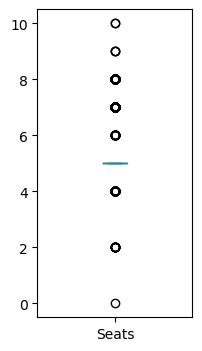

In [3963]:
df_clean['Seats'].plot.box(figsize=(2,4))

Abbiamo visto prima che più del 90% del dataset ha 5 posti. Probabilmente anche per questo motivo viene considerato outlier qualsiasi numero non sia 5. Lasciamo tutto così, dato che è tutto perfettamente plausibile.

Tuttavia notiamo che c'è un auto con zero posti, impossibile:

In [3964]:
df_clean[df_clean['Seats'] < 1]

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3880,Audi,A4,Hyderabad,7,125000.0,Petrol,Automatic,First,10,3197,NaN,0.0,NaN,18.0


Abbiamo deciso di imputargli la moda della variabile '5':

In [3965]:
df_clean.loc[df_clean['Seats'] < 1, 'Seats'] = 5

print("Valori imputati.")

Valori imputati.


**12. `New Price`**

Questa variabile contiene il valore del prezzo del nuovo modello di quell'auto, espresso in Lakh.

> Contiene un valore continuo.

*Gestione dei valori mancanti*

In [3966]:
print(f"Valori mancanti: {df_clean['New_Price'].isna().sum()}")

Valori mancanti: 5027


Questa colonna ha quasi tutti i valori mancanti. La sua gestione è molto problematica perché un imputazione risulta difficile perché non abbiamo abbastanza informazioni. Inoltre è inutile anche ai fini dell'analisi mantenere questa variabile.

Quindi abbiamo deciso di rumuoverla per una questione di pulizia del dataset.

In [3967]:
df_clean.drop('New_Price', axis=1, inplace=True)

print("Colonna rimossa.")

Colonna rimossa.


**13. `Price`**

Questa variabile contiene il prezzo con cui è stata venduta l'auto.

> Contiene un valore continuo.

Come visto prima questa variabile non ha alcun valore mancante.

Non c'è alcun controllo di formattazione o inconsistenza da fare per questa variabile. Essa è già pulita.

* Gestione degli outliers*

Vediamo il boxplot:

<Axes: >

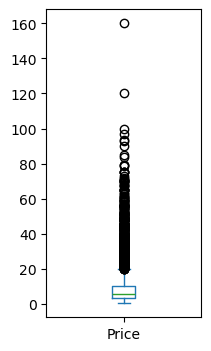

In [3968]:
df_clean['Price'].plot.box(figsize=(2,4))

Innanzitutto notiamo una distribuzione altamente asimmetrica, per la precisione right-skewed (se plottassimo la distribuzione). In futuro converrebbe fare una trasformazione logaritmica per portare la sua ditribuzione ad assomigliare a quella normale (Gaussiana), per migliorare le performance del notro modello.

Vediamo che presenta molti valori alti, potrebbero riferirsi ad auto molto costose come auto di lusso, ma vediamo meglio:

In [3969]:
df_clean[df_clean['Price'] > 100]

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3959,Land,Rover,Hyderabad,2,25000.0,Diesel,Automatic,First,13,2993,255.0,5.0,160.0
5612,Lamborghini,Gallardo,Delhi,8,6500.0,Petrol,Automatic,Third,6,5204,560.0,2.0,120.0


Infatti stimo parlando di auto di lusso, che sono molto costose. Non si trattano di outliers, non sono errori di prezzo. Tuttavia essendo che la nostra analisi include anche questo tipo di auto, abbiamo deciso di non rimuovere queste osservazioni.

Facciamo un controllo mirato per valori impossibili:

In [3970]:
df_clean[df_clean['Price'] < 0.5]

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1670,Tata,Nano,Pune,8,65000.0,Petrol,Manual,Second,26,624,35.0,4.0,0.44
2762,Hyundai,Getz,Pune,14,86000.0,Petrol,Manual,Second,15,1341,83.0,5.0,0.45


Non abbiamo alcun valore zero (sarebbero senza dubbio outlier), ma queste auto non sono outlier.

> Abbiamo finito il nostro processo di Data Cleaning & Preparation, ne risulta un dataset più pulito e pronto per un analisi più approfondita.

---

## Analisi Esplorativa

Questa parte si concentra su uno studio più approfondito delle caratteristiche delle nostre osservazioni e sulle loro possibili correlazioni.

Si divide in due parti:
- **Analisi Univariata**, in cui calcoleremo le varie statistiche sommarie per una variabile alla volta
- **Analisi Multivariata**, in cui andremo ad esplorare le varie correlazioni provando a spiegare eventuali scoperte

### Analisi Univariata

Come detto prima ci concentreremo su una variabile alla volta, seguendo un po' lo schema utilizzato per la parte precedente.

**1. `Brand` e `Model`**

Trattiamo queste due variabili in un'unica sezione a causa della loro correlazione intrinseca (le abbiamo precedentemente estratte dalla stessa variabile `Name`).

Vediamo quanti differenti Brand abbiamo:

In [3971]:
print(f"Numero di Brand: {len(df_clean['Brand'].unique())}")

Numero di Brand: 30


Andiamoli a visualizzare:

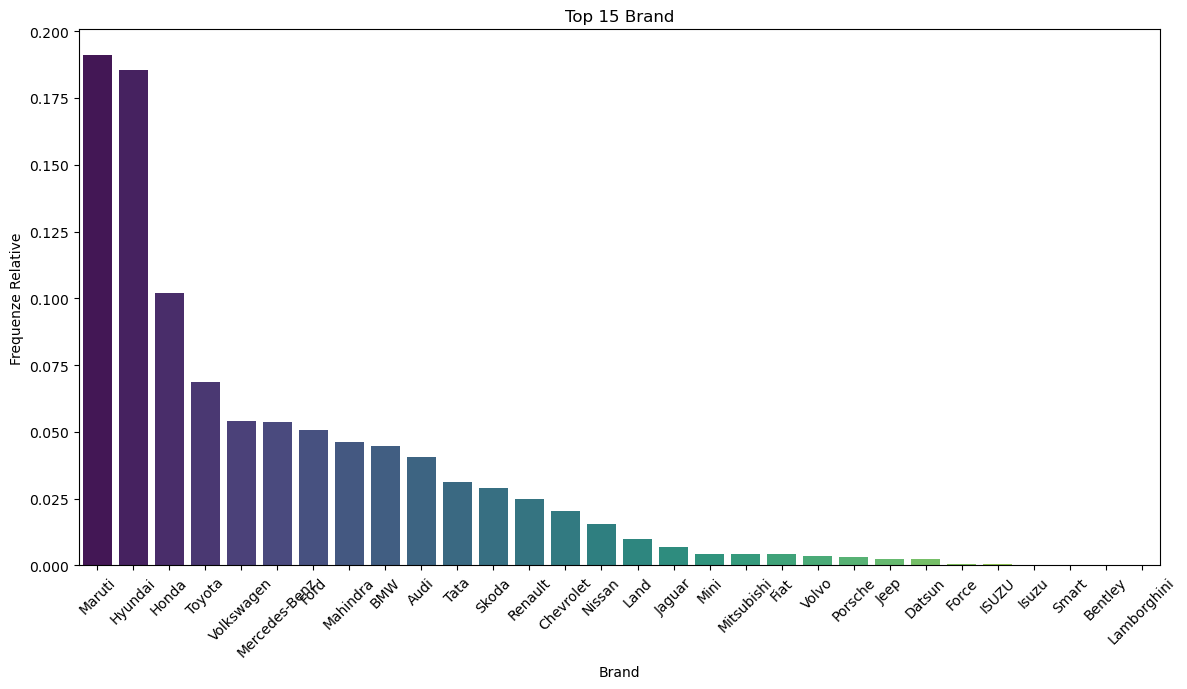

In [3972]:
import seaborn as sns

brands = df_clean['Brand'].value_counts(normalize=True)

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=brands.index, y=brands.values, hue=brands.index, palette='viridis', legend=False)

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

plt.title('Top 15 Brand')
plt.xticks(rotation=45)
plt.ylabel('Frequenze Relative')

plt.tight_layout()
plt.show()

Vediamo come il dataset è dominato da un certo numero di brand, alcuni coprono oltre il 10%, altri nemmeno lo 0.01%. Andiamo a visualizzare i top 10 brand.

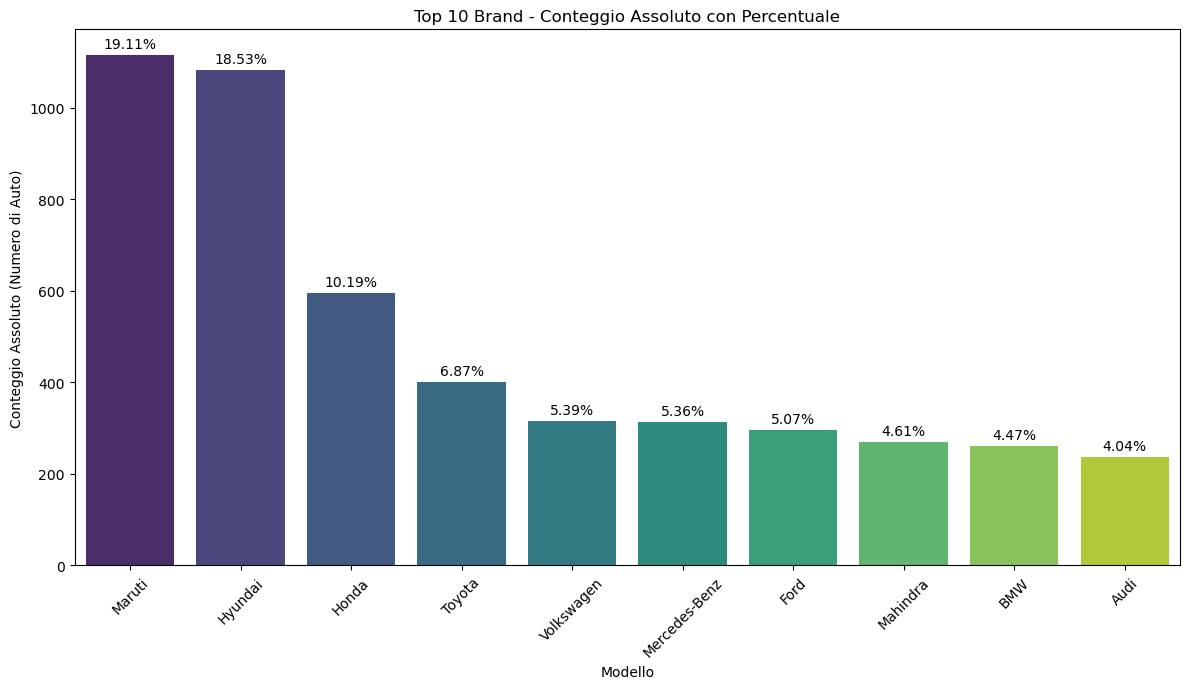

In [3973]:
count_assoluto = df_clean['Brand'].value_counts().head(10)

count_relativo = (df_clean['Brand'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Top 10 Brand - Conteggio Assoluto con Percentuale')
plt.xticks(rotation=45)
plt.ylabel('Conteggio Assoluto (Numero di Auto)')
plt.xlabel('Modello')

plt.tight_layout()
plt.show()

Possiamo già concludere che il dataset è predominato da automobili utilitarie e non molto costose (Muruti, Hyndai, Honda, Toyota, etc...), la top 5 copre circa il 60% del dataset.

Il rischio per questa variabile è che se volessimo utilizzare `Brand` per un modello, essendoci troppi valori unici, rischiamo di imbatterci in un overplotting, in cui il modello impara il training-set e non generaizza al meglio.

Tuttavia rimuovere questa variabile sarebbe una soluzione drastica. Potremmo creare una nuova caratteristica `Price_Class`, che in base ad altre variabili come il prezzo e la cilindrata del motore, assegni ad ogni osservazione un etichetta su 4-5 (es. 'di-lusso', 'economica').

Per il momento la manterremo così ed andremo avanti con l'analisi.

AGGIUNGI ANALISI NELLA SEZIONE DI DATA CLEANING

Per quanto riguarda `Model` vale lo stesso discorso fatto per 'Brand' ma amplificato. Ogni brand ha tantissimi modelli che raramente si discostano dalla maggior parte di tipo di auto che la casa automobilistica produce.

Inoltre Model dipende molto da Brand, potremmo dire che non può esistere senza di esso, quindi si potrebbe anche rumuovere.

Analizziamo i modelli:

In [3974]:
num_of_models = len(df_clean['Model'].unique())
print(f"Numero di Model: {num_of_models}")

Numero di Model: 205


Abbiamo 205 diversi modelli nel nostro dataset.

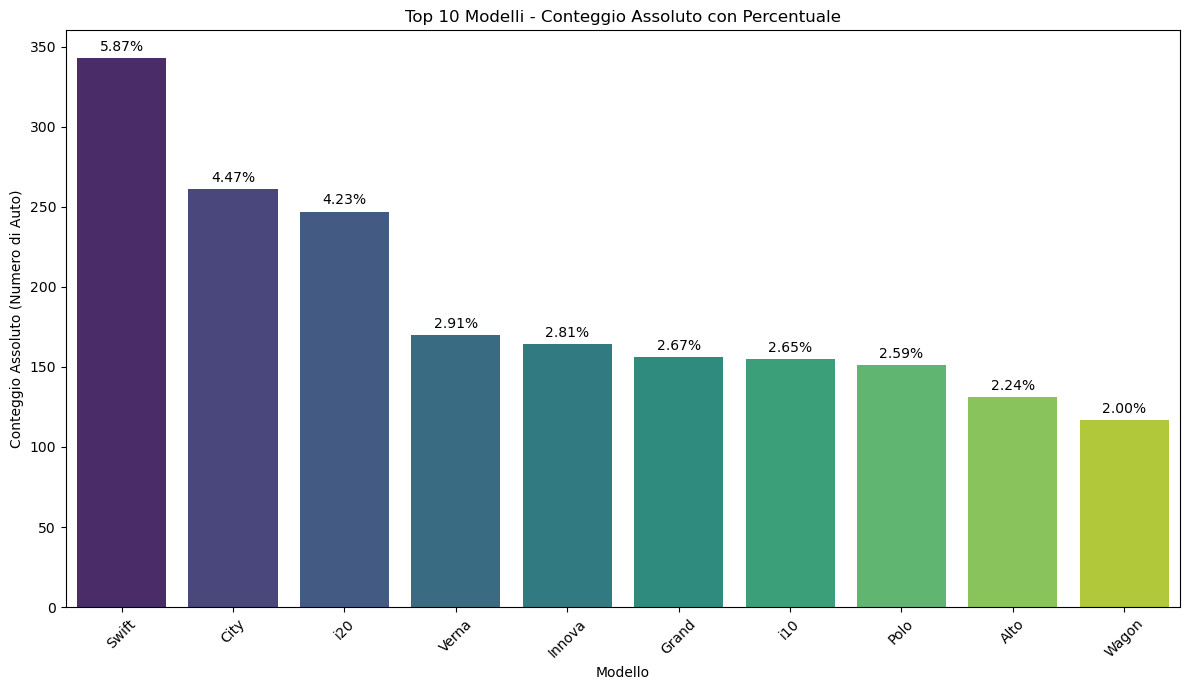

In [3975]:
count_assoluto = df_clean['Model'].value_counts().head(10)

count_relativo = (df_clean['Model'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Top 10 Modelli - Conteggio Assoluto con Percentuale')
plt.xticks(rotation=45)
plt.ylabel('Conteggio Assoluto (Numero di Auto)')
plt.xlabel('Modello')

plt.tight_layout()
plt.show()

I top 10 brand non arrivano a comporre il 30% del dataset, e sappiamo che abbiamo più d 200 valori unici. Questa variabile è troppo rumorosa.

**2. `Location`**

Visiaulizziamo il numero di osservazioni per Location:

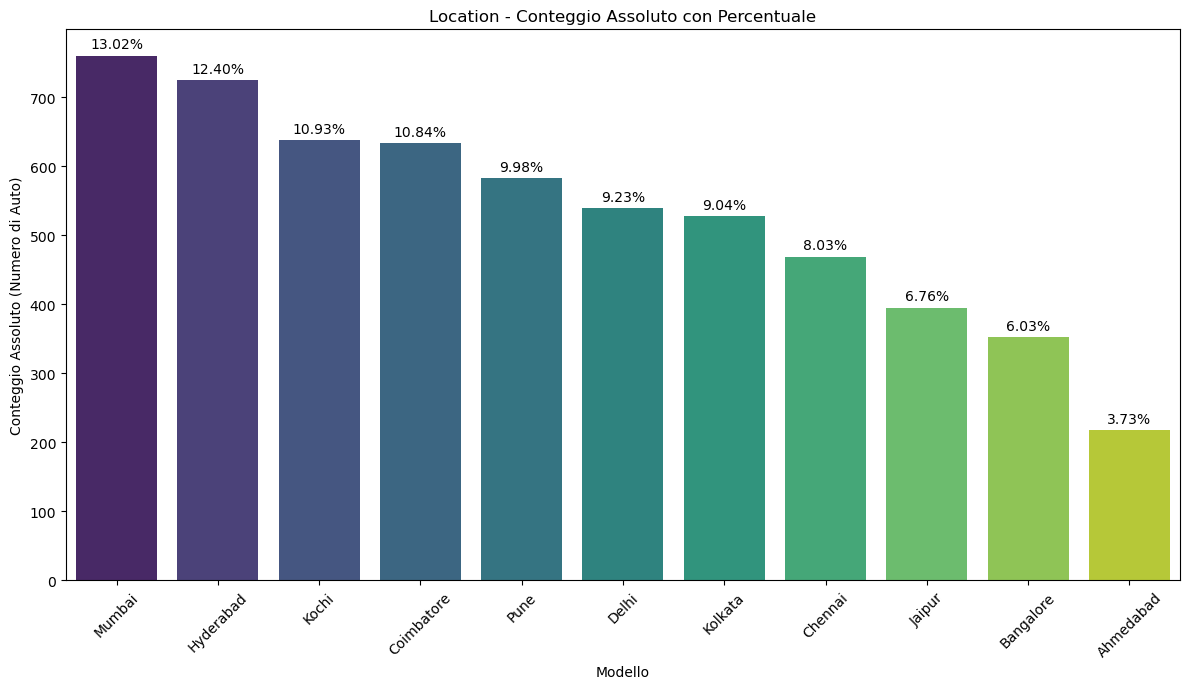

In [3976]:
count_assoluto = df_clean['Location'].value_counts()

count_relativo = (df_clean['Location'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Location - Conteggio Assoluto con Percentuale')
plt.xticks(rotation=45)
plt.ylabel('Conteggio Assoluto (Numero di Auto)')
plt.xlabel('Modello')

plt.tight_layout()
plt.show()

Notiamo che non c'è nessun luogo troppo predominante,  è tutto molto equilibrato.

**3. `Age`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [3977]:
col = df_clean['Age']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5839.000000
mean        5.479020
std         3.023863
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: Age, dtype: float64

mode:  0    5
Name: Age, dtype: int64

Skewness: 0.55
Kurtosis: -0.15


Notiamo varie cose:
- il **50% dei valori** ha tra i 3-7 anni
- **media**: 5.4, **mediana**: 5. Vuol dire che abbiamo dei valori che 'spingono' la media verso destra
- dalla **skewness** (asimmetria) notiamo che è assimetrica verso destra, come notato prima
- **kurtosis** ci indica che ha il picco un po' più schiacciato rispetto alla normale (gaussiana)

Vediamo la sua distribuzione:

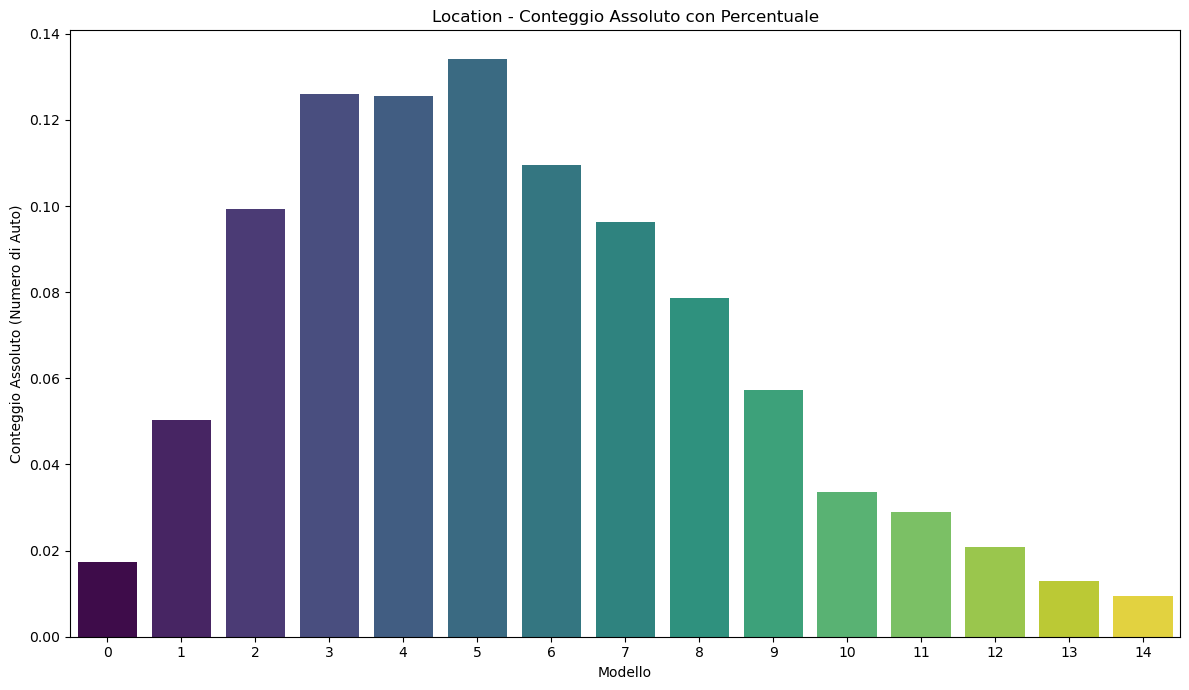

In [3978]:
count = df_clean['Age'].value_counts(normalize=True)

plt.figure(figsize=(12, 7))

sns.barplot(x=count.index, y=count.values, hue=count.index, palette='viridis', legend=False)

plt.title('Location - Conteggio Assoluto con Percentuale')
plt.xticks(rotation=0)
plt.ylabel('Conteggio Assoluto (Numero di Auto)')
plt.xlabel('Modello')

plt.tight_layout()
plt.show()

Tende ad una distribuzione normale, ci piace.